12.1 The Erdős–Rényi random graph

12.1.a

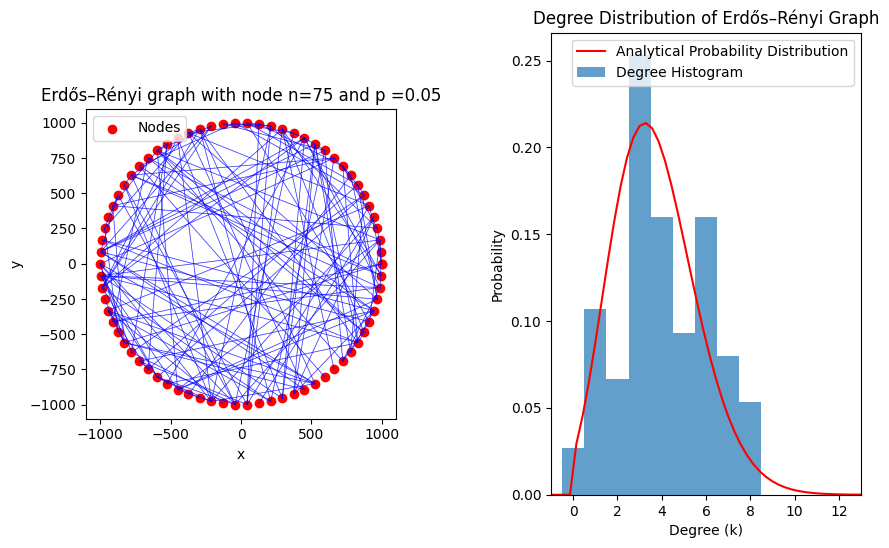

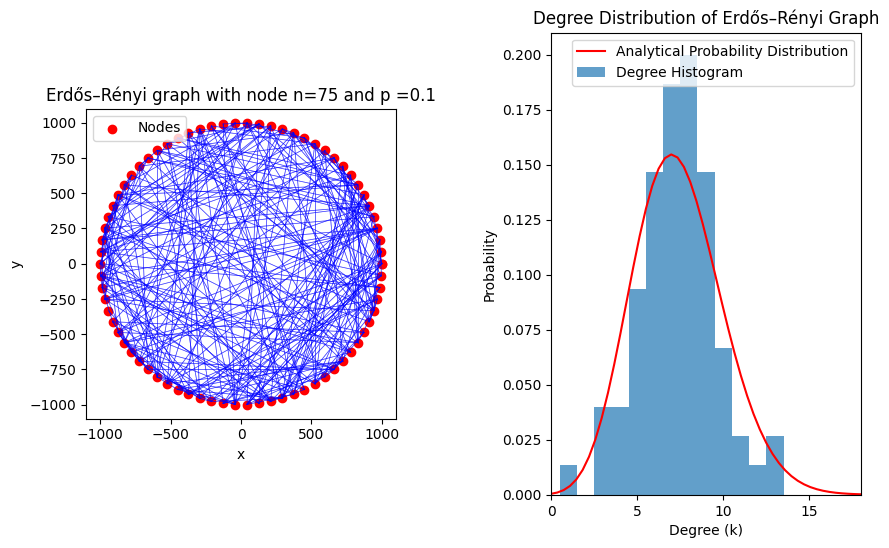

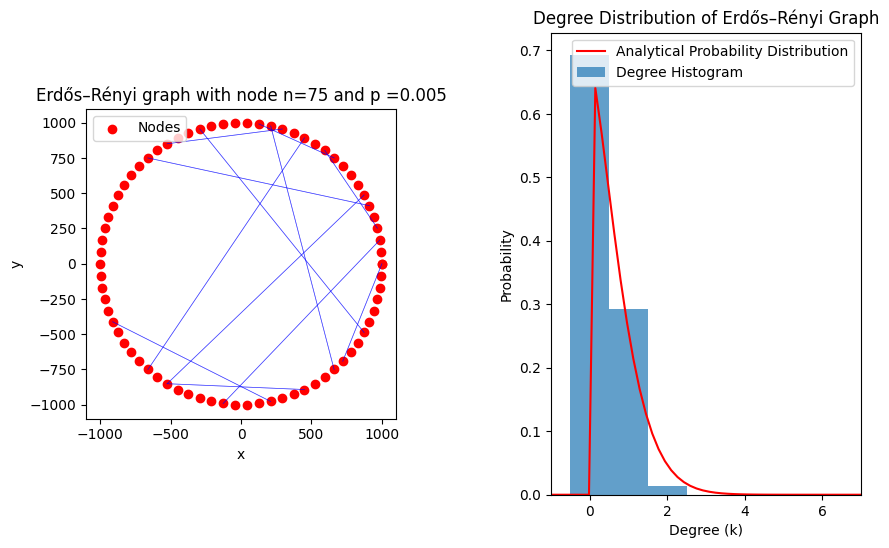

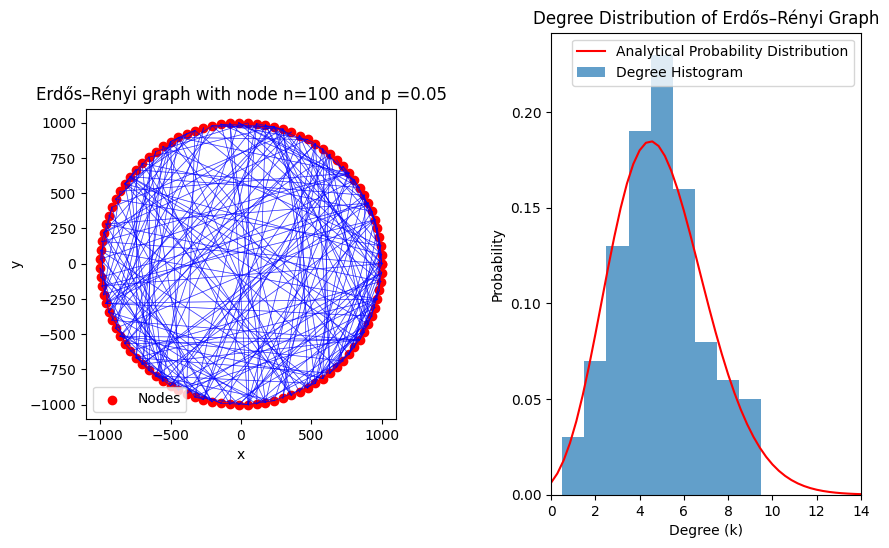

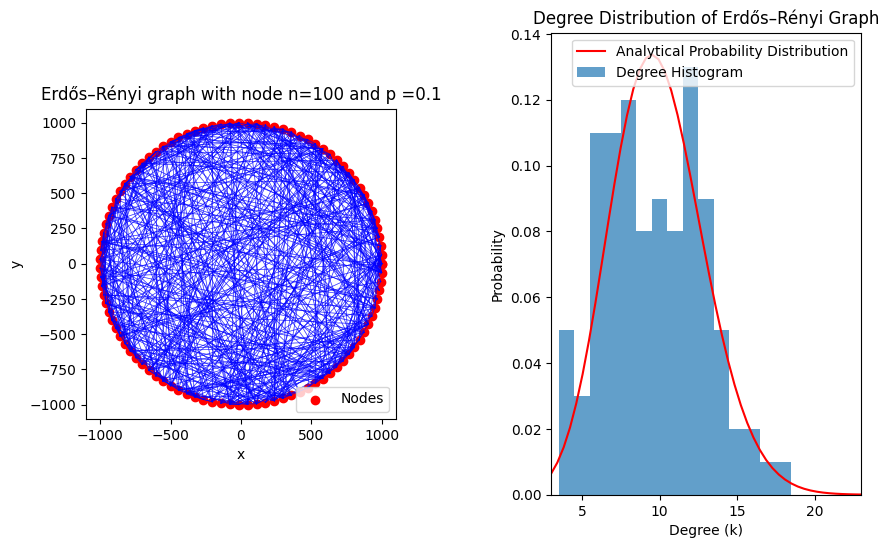

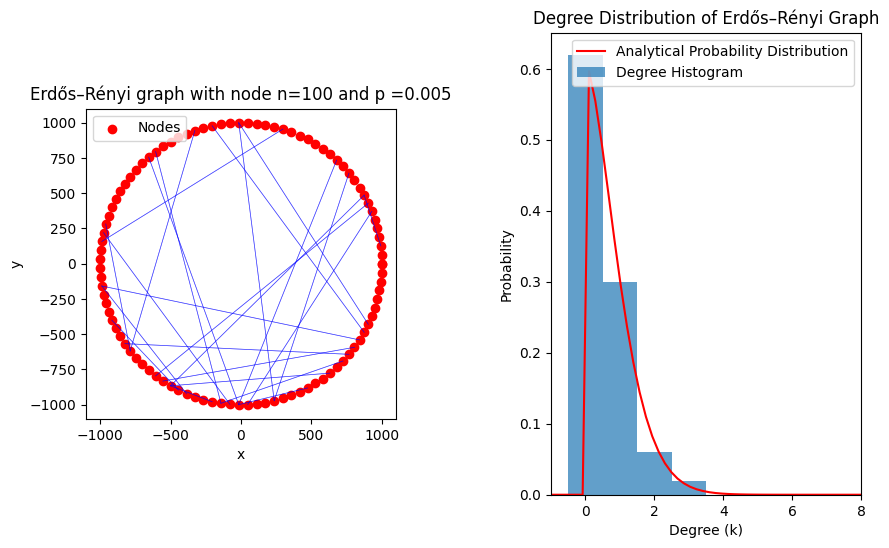

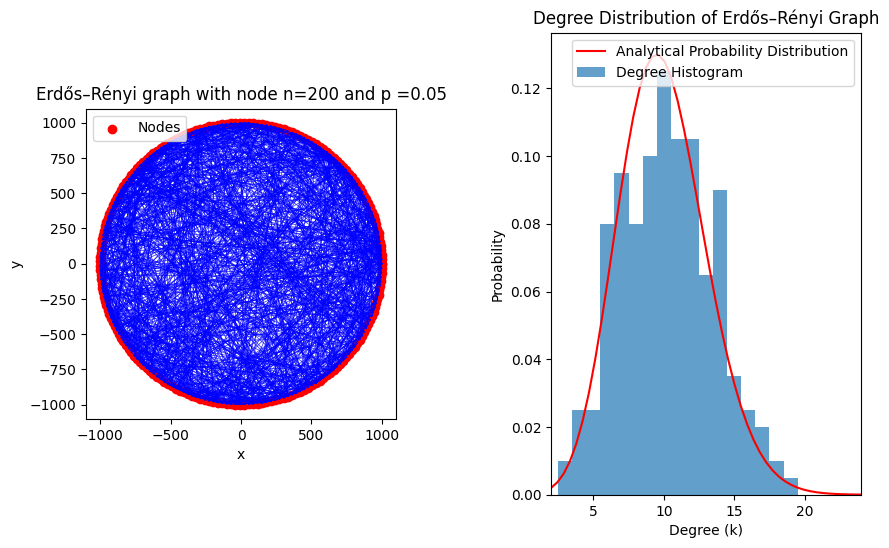

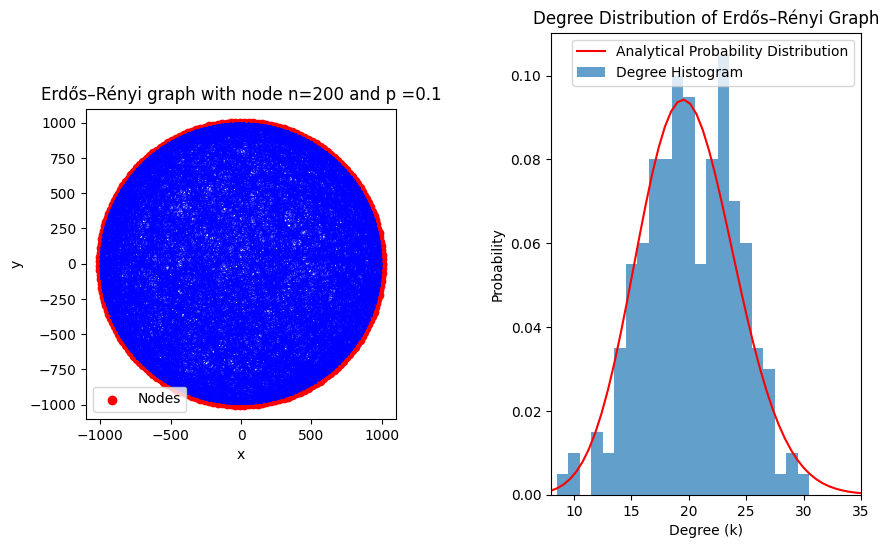

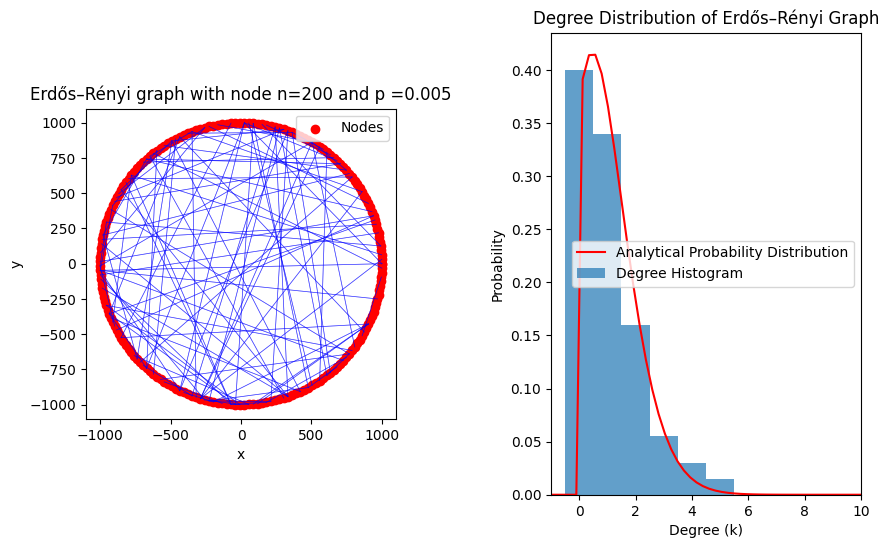

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import random
from scipy.special import comb

n_list= [75,100, 200]  
# no_edges = n*(n-1)/2
p_list = [0.05, 0.1, 0.005]
r = 1000 #radius of circle for plotting
graphnumber =0

for n in n_list:
        for p in p_list:
            graphnumber+=1
            n=n
            p=p
            amatrix = np.zeros((n,n))
            for i in range(n):
                for j in range(n):
                    if i>j:
                        x= random.random()
                        if x< p:
                            amatrix[i][j]= 1
                            amatrix[j][i]=1
            degree= np.zeros((n,1))

            for i in range(n):
                degree[i,:] = np.sum(amatrix[i,:])

            def probability_distribution(n, p, k):
                return comb(n-1, k) * (p**k) * ((1-p)**(n-k-1))

            k_values = np.linspace(np.min(degree)-1, np.max(degree)+5,50)
            p_k_list=[]
            for k in k_values: 
                p_k_analytical =  probability_distribution(n, p, k)
                p_k_list.append(p_k_analytical)



            theta = np.linspace(0, 2*np.pi, n)
            x = r * np.cos(theta)
            y = r * np.sin(theta)


            # print(amatrix)
            plt.figure(figsize=(10, 6))

            plt.subplot(1,2,1)
            plt.scatter(x, y, color='red', label='Nodes')
            for i in range(n):
                for j in range(n):
                    if amatrix[i][j] ==1:
                        plt.plot([x[i], x[j]], [y[i], y[j]], color='blue', alpha=0.5, linewidth= 0.5)
            plt.gca().set_aspect('equal', adjustable='box')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.legend()
            plt.title(f'Erdős–Rényi graph with node n={n} and p ={p}')
            
            plt.subplot(1,2,2)
            plt.plot(k_values, p_k_list, label='Analytical Probability Distribution', color='red')
            plt.hist(degree, bins=np.arange(n+1)-0.5, density=True, alpha=0.7, label='Degree Histogram')
            plt.xlabel('Degree (k)')
            plt.ylabel('Probability')
            plt.title('Degree Distribution of Erdős–Rényi Graph')
            plt.xlim(np.min(degree)-1, np.max(degree)+5)
            plt.legend()
            plt.subplots_adjust(wspace=0.5)  # Adjust the width space between subplots

            plt.show()

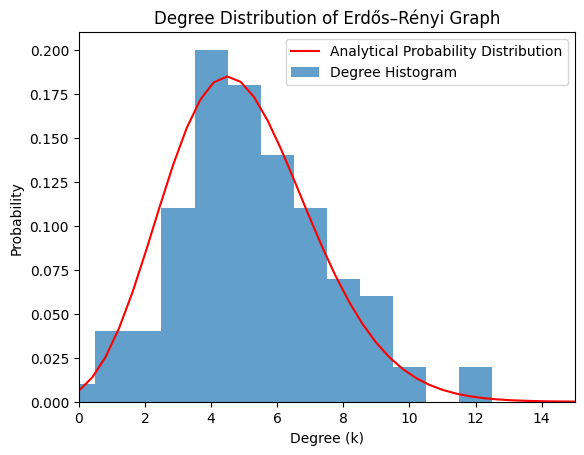

In [88]:
n=100
p=0.05
amatrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if i>j:
            x= random.random()
            if x< p:
                amatrix[i][j]= 1
                amatrix[j][i]=1
degree= np.zeros((n,1))
for i in range(n):
    degree[i,:] = np.sum(amatrix[i,:])

def probability_distribution(n, p, k):
    return comb(n-1, k) * (p**k) * ((1-p)**(n-k-1))

k_values = np.linspace(0,20,50)
p_k_list=[]
for k in k_values: 
    p_k_analytical =  probability_distribution(n, p, k)
    p_k_list.append(p_k_analytical)

# plt.plot(k_values, p_k_list)
# # plt.show()
# plt.hist(degree, bins=12) 
# plt.show()  


plt.plot(k_values, p_k_list, label='Analytical Probability Distribution', color='red')
plt.hist(degree, bins=np.arange(n+1)-0.5, density=True, alpha=0.7, label='Degree Histogram')

plt.xlabel('Degree (k)')
plt.ylabel('Probability')
plt.title('Degree Distribution of Erdős–Rényi Graph')
plt.xlim(0,15)
plt.legend()
plt.show()


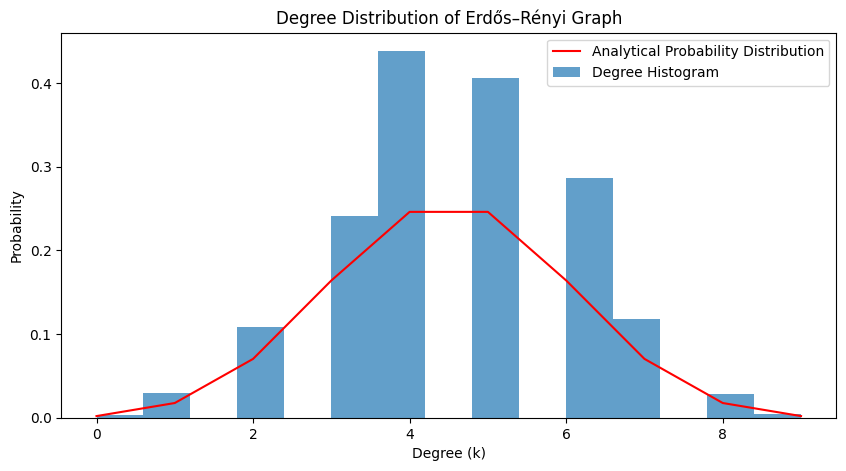

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def probability_distribution(n, p, k):
    return comb(n-1, k) * (p**k) * ((1-p)**(n-k-1))

n = 10  # Replace with your desired value for the total number of nodes
p = 0.5  # Replace with your desired probability value

k_values = np.arange(n)
p_k_list = [probability_distribution(n, p, k) for k in k_values]

# Generate a random graph based on the probability p
degree = np.random.binomial(n-1, p, size=1000)

plt.figure(figsize=(10, 5))

# Plot the probability curve
plt.plot(k_values, p_k_list, label='Analytical Probability Distribution', color='red')

# Plot the histogram
# plt.hist(degree, bins=np.arange(n+1)-0.5, density=True, alpha=0.7, label='Degree Histogram')
plt.hist(degree, bins=15, density=True, alpha=0.7, label='Degree Histogram')

plt.xlabel('Degree (k)')
plt.ylabel('Probability')
plt.title('Degree Distribution of Erdős–Rényi Graph')
plt.legend()
plt.show()
